In [26]:
import pandas as pd
import os

DATA_PATH = '.'
path = os.path.join(DATA_PATH, 'syntheticnet_sim_results.csv')
results = pd.read_csv(path, sep='\t')

## 10 runs

In [4]:
results = results[['strategy','beta', 'gamma', 'epsilon', 'avg_qual']]

In [31]:
results.head()

,Unnamed: 0,strategy,beta,gamma,epsilon,avg_qual
0,0,none,0.02,0.02,0.0100,0.356
1,1,hub,0.02,0.02,0.0100,0.346
2,2,none,0.02,0.02,0.0010,0.357
3,3,hub,0.02,0.02,0.0010,0.335
4,4,none,0.02,0.02,0.0001,0.313


In [10]:
beta=0.02
gamma=0.02
results_none  = results[(results['strategy']=='none') & (results['beta']==beta) & (results['gamma']== gamma)]
results_hub  = results[(results['strategy']=='hub') & (results['beta']==beta) & (results['gamma']== gamma)]

In [12]:
results_none = results_none.sort_values(by='epsilon')
results_hub = results_hub.sort_values(by='epsilon')

In [14]:
import matplotlib.pyplot as plt

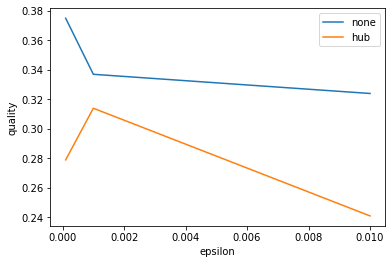

In [19]:
plt.plot(results_none['epsilon'], results_none['avg_qual'], label='none')
plt.plot(results_hub['epsilon'], results_hub['avg_qual'], label='hub')
plt.xlabel('epsilon')
plt.ylabel('quality')
plt.legend()

In [22]:
def plot_comparison(results, beta=0.04, gamma=0.04, epsilon=0.001, x_axis='epsilon', y_axis='avg_qual'): 
    # x_axis & y_axis must match with results df column name!
    if x_axis=='epsilon':
        results_none  = results[(results['strategy']=='none') & (results['beta']==beta) & (results['gamma']== gamma)]
        results_hub  = results[(results['strategy']=='hub') & (results['beta']==beta) & (results['gamma']== gamma)]
    elif x_axis=='beta':
        results_none  = results[(results['strategy']=='none') & (results['epsilon']==epsilon) & (results['gamma']== gamma)]
        results_hub  = results[(results['strategy']=='hub') & (results['epsilon']==epsilon) & (results['gamma']== gamma)]
    elif x_axis=='gamma':
        results_none  = results[(results['strategy']=='none') & (results['epsilon']==epsilon) & (results['beta']== beta)]
        results_hub  = results[(results['strategy']=='hub') & (results['epsilon']==epsilon) & (results['beta']== beta)]
        
    plt.plot(results_none[x_axis], results_none[y_axis], label='none')
    plt.plot(results_hub[x_axis], results_hub[y_axis], label='hub')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.title('Compare strategy average quality with varying %s' %x_axis)
    plt.show()

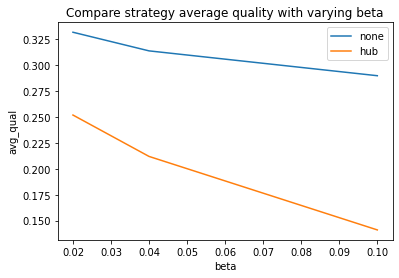

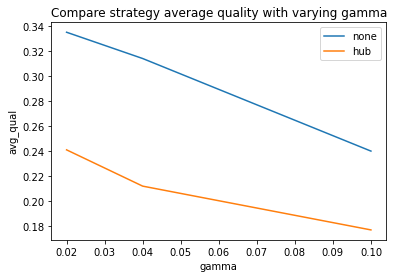

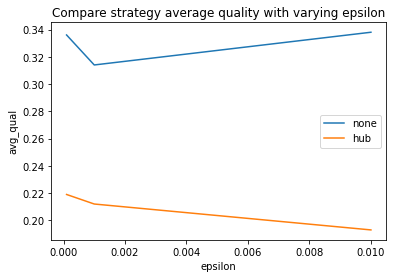

In [23]:
for param in ['beta', 'gamma', 'epsilon']:
    plot_comparison(results,  x_axis=param, y_axis='avg_qual')

## 1 run

In [27]:
path = os.path.join(DATA_PATH, 'syntheticnet_sim_results_1run.csv')
results = pd.read_csv(path, sep='\t')

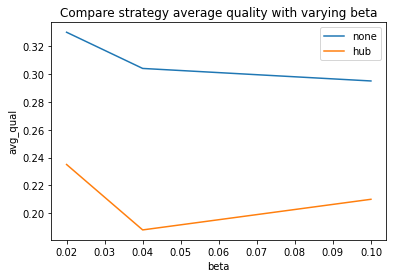

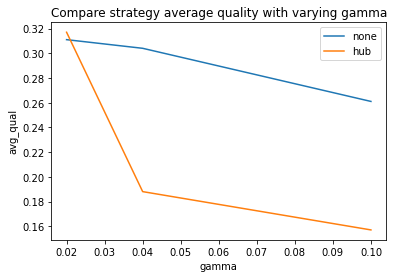

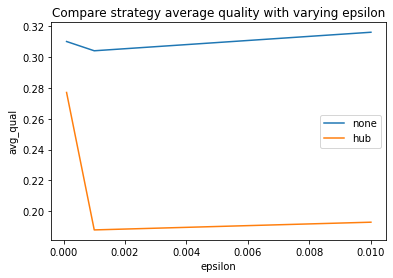

In [28]:
for param in ['beta', 'gamma', 'epsilon']:
    plot_comparison(results,  x_axis=param, y_axis='avg_qual')

## 30 runs

In [29]:
path = os.path.join(DATA_PATH, 'syntheticnet_sim_results_30runs.csv')
results = pd.read_csv(path, sep='\t')

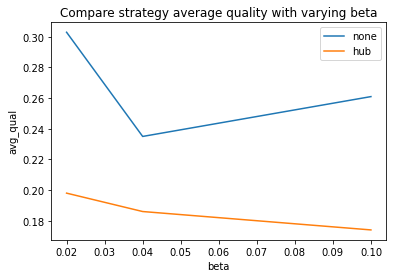

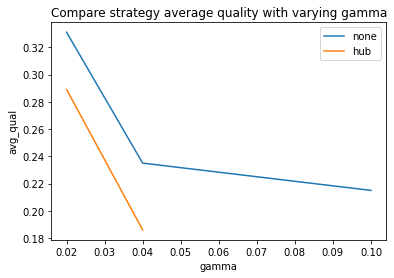

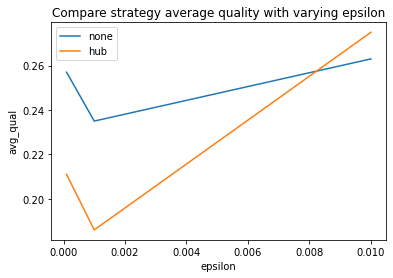

In [30]:
for param in ['beta', 'gamma', 'epsilon']:
    plot_comparison(results,  x_axis=param, y_axis='avg_qual')